In [49]:
import numpy as np                        ##importing all required libraries & dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [51]:
wine_dataset=pd.read_csv('/content/winequality-red.csv')    #loading the dataset

In [52]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [53]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
wine_dataset.shape

(1599, 12)

In [55]:
print(wine_dataset)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [56]:
wine_dataset.describe()     ##statistical measurements of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='residual sugar'>

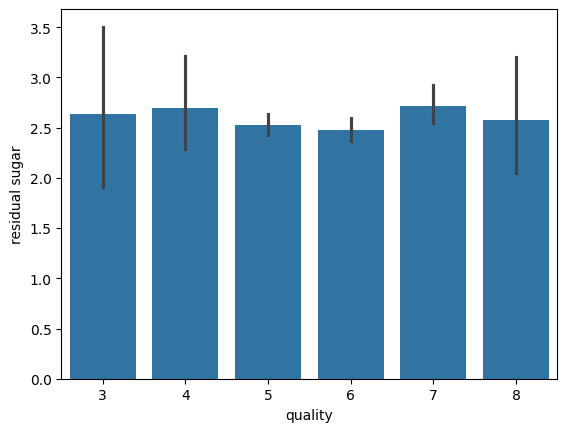

In [57]:
sns.barplot(x='quality', y='residual sugar',data=wine_dataset)      ##correlation btwn the paramtrs and quality of wine

<Axes: xlabel='quality', ylabel='citric acid'>

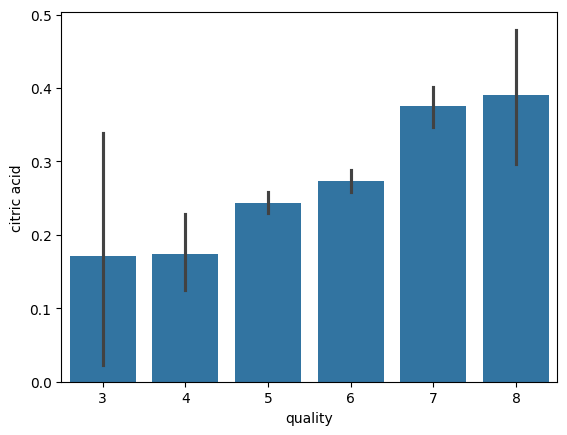

In [58]:
sns.barplot(x='quality', y='citric acid',data=wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

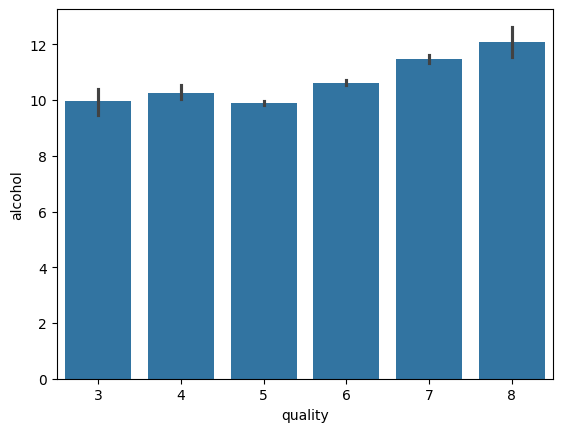

In [59]:
sns.barplot(x='quality', y='alcohol',data=wine_dataset)

In [60]:
correlation=wine_dataset.corr()

<Axes: >

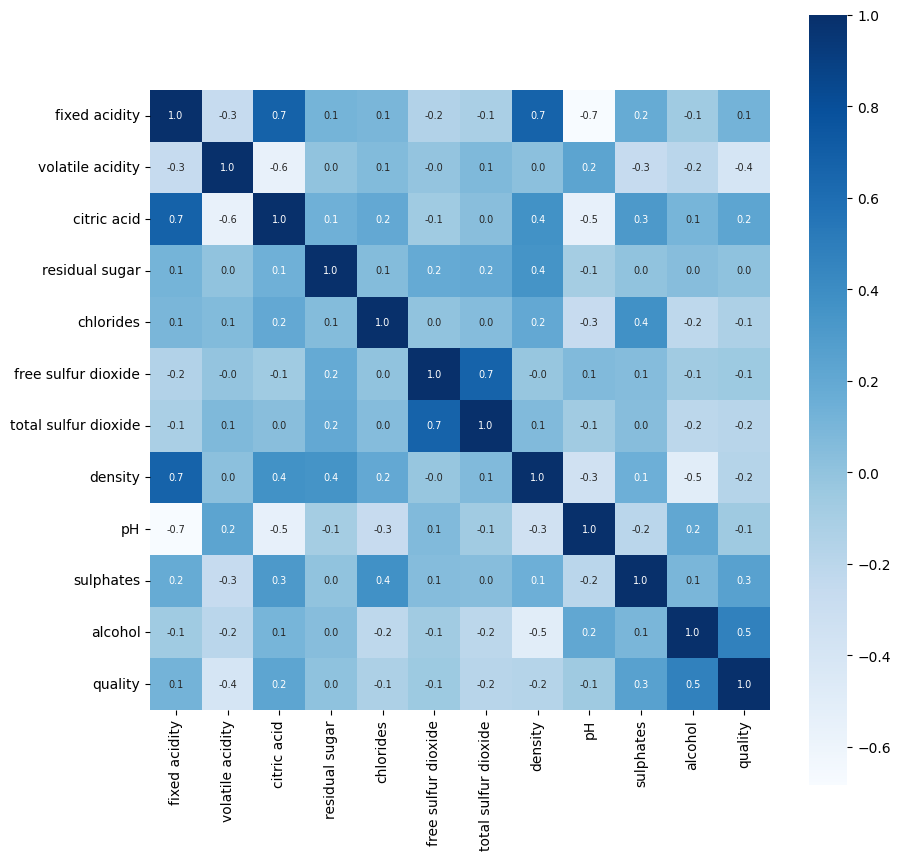

In [61]:
plt.figure(figsize=(10,10))                 ## heatmap for better understanding of correlation
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':7},cmap='Blues')

In [62]:
X=wine_dataset.drop('quality',axis=1)   ## separating the quality column from the dataset


In [63]:
print(X)
X.head()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [64]:
Y=wine_dataset['quality'].apply(lambda Y_value:1 if Y_value>=6 else 0)    #Binarization or labelization of labeled data elements
Y.head()

,quality
0,0
1,0
2,0
3,1
4,0


In [65]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


In [66]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2,random_state=3)   ##splitting the data into training and testing data

In [75]:
print(X.shape,X_train.shape,X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [76]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


In [77]:
model=RandomForestClassifier()        #predicting or classification model

In [78]:
model.fit(X_train,Y_train)  ## training of the model

RandomForestClassifier()

In [79]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("accuracy matrix on test data:",X_test_prediction)

accuracy on test data: [0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1
 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1
 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1
 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1
 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0]


In [80]:
print('accuracy score on the test data:',test_data_accuracy)        ##acuracy score

accuracy score on the test data: 0.859375


In [82]:
input_data=(7.8,	0.88,	0.00,	2.6	,0.098,25.0,	67.0,	0.9968,	3.20,	0.68,	9.8	)    ##prediction on the testing datavalues
input_data_as_array=np.asarray(input_data)
input_data_reshaped=input_data_as_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('bad quality wine')
else:
    print('good quality of wine')

[0]
bad quality wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [88]:
input_data = input('enter the parameters for wine quality check (comma-separated):')        ##prediction on the user inputed data pramtrs
input_data_list = [float(x.strip()) for x in input_data.split(',')]  # Convert to list of floats
input_data_as_array = np.asarray(input_data_list)
input_data_reshaped = input_data_as_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if prediction[0] == 0:
    print('bad quality wine')
else:
    print('good quality of wine')

enter the parameters for wine quality check (comma-separated):7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,


ValueError: could not convert string to float: ''

In [89]:
input_data = input('enter the parameters for wine quality check (comma-separated):')
input_data_list = [float(x.strip()) for x in input_data.split(',') if x.strip()]  # Convert to list of floats, ignoring empty strings
input_data_as_array = np.asarray(input_data_list)
input_data_reshaped = input_data_as_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if prediction[0] == 0:
    print('bad quality wine')
else:
    print('good quality of wine')

enter the parameters for wine quality check (comma-separated):7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,
[1]
good quality of wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
